<a href="https://colab.research.google.com/github/DeepLearningSaeid/Grad/blob/main/Pure_implimentation_SWAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from keras.layers import Input, Dense, concatenate
from keras.models import Model
from keras.layers import Activation
import keras.backend as K

# Load Pima Indians Diabetes dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(url, names=names)

# Separate features and labels
X = data.drop('class', axis=1).values
Y = data['class'].values

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

def define_activation_functions():
    activations = [
        ('X_1', lambda x: K.pow(x, 1)),
        ('X_2', lambda x: K.pow(x, 2) / 2),
        ('X_2_', lambda x: K.pow(x, 2) / 24),
        ('X_2__', lambda x: K.pow(x, 2) / 720),
    ]
    for name, func in activations:
        get_custom_objects().update({name: Activation(func)})

define_activation_functions()

def create_optimized_model(input_dim, hidden_dim, output_dim):
    input_layer = Input(shape=(input_dim,))
    x1 = Dense(hidden_dim, activation='X_1')(input_layer)
    x2 = Dense(hidden_dim, activation='X_2')(input_layer)
    merged1 = concatenate([x1, x2])
    x3 = Dense(hidden_dim, activation='X_2_')(merged1)
    x4 = Dense(hidden_dim, activation='X_2__')(x3)
    merged2 = concatenate([x1, x2, x3, x4])
    output = Dense(output_dim, activation='X_1')(merged2)
    model = Model(inputs=input_layer, outputs=output)
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
    return model

input_dim = 8
hidden_dim = 50
output_dim = 1
n_folds = 10

# Initialize Stratified K-Fold
kf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize lists to store performance metrics for each fold
accuracy_scores = []
mse_scores = []

# Perform cross-validation
for train_index, val_index in kf.split(X, Y):
    X_train, X_val = X[train_index], X[val_index]
    Y_train, Y_val = Y[train_index], Y[val_index]

    # Create and compile the model
    model = create_optimized_model(input_dim, hidden_dim, output_dim)

    # Train the model
    model.fit(X_train, Y_train, epochs=10, batch_size=32, verbose=0)

    # Evaluate the model on the validation set
    val_loss, val_mse = model.evaluate(X_val, Y_val, verbose=0)

    # Calculate Mean Squared Error (MSE)
    Y_val_pred = model.predict(X_val)
    mse = np.mean((Y_val - Y_val_pred)**2)

    # Append accuracy and MSE to lists
    accuracy_scores.append(val_loss)
    mse_scores.append(mse)

# Calculate and print the average performance metrics over all folds
average_loss = np.mean(accuracy_scores)
average_mse = np.mean(mse_scores)

print(f'Average Loss: {average_loss:.2f}')
print(f'Average MSE: {average_mse:.2f}')
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Average Loss: 0.16
Average MSE: 0.31
Model: "model_54"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_15 (InputLayer)       [(None, 8)]                  0         []                            
                                                                                                  
 dense_310 (Dense)           (None, 50)                   450       ['input_15[0][0]']            
                                                                                                  
 dense_311 (Dense)           (None, 50)                   450       ['input_15[0][0]']            
                                                                                                  
 concatenate_118 (Concatena  (None, 100)                  0         ['dense_310[0][0]',           
 te)                                                  

In [85]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, concatenate, Activation
from tensorflow.keras.models import Model

class CustomNeuralNetwork:
    def __init__(self, input_dim, hidden_dim, output_dim):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.model = self._create_model()

    def _define_activation_functions(self):
        activations = [
            ('X_1', lambda x: x),  # Identity function for X_1
            ('X_2', lambda x: tf.pow(x, 2) / 2),
            ('X_2_', lambda x: tf.pow(x, 2) / 24),
            ('X_2__', lambda x: tf.pow(x, 2) / 720),
        ]
        for name, func in activations:
            tf.keras.utils.get_custom_objects()[name] = Activation(func)

    def _create_model(self):
        self._define_activation_functions()

        input_layer = Input(shape=(self.input_dim,))
        x1 = Dense(self.hidden_dim, activation='X_1')(input_layer)
        x2 = Dense(self.hidden_dim, activation='X_2')(input_layer)
        merged1 = concatenate([x1, x2])
        x3 = Dense(self.hidden_dim, activation='X_2_')(merged1)
        x4 = Dense(self.hidden_dim, activation='X_2__')(x3)
        merged2 = concatenate([x1, x2, x3, x4])
        output = Dense(self.output_dim, activation='X_1')(merged2)

        model = Model(inputs=input_layer, outputs=output)
        model.compile(loss='mean_squared_error', optimizer='adam')
        return model

    def summary(self):
        return self.model.summary()

    def fit(self, x, y, **kwargs):
        return self.model.fit(x, y, **kwargs)

    def predict(self, x):
        return self.model.predict(x)

# Example usage:
# custom_nn = CustomNeuralNetwork(input_dim, hidden_dim, output_dim)
# custom_nn.summary()  # Display model summary
# custom_nn.fit(x_train, y_train, epochs=100, batch_size=32)  # Train the model
# predictions = custom_nn.predict(x_test)  # Make predictions


In [2]:
import numpy as np

# Define the architecture
input_size = 2
hidden1_size = 4
hidden2_size = 3
hidden3_size = 2
output_size = 1

# Define activation functions (sigmoid in this case)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Define training parameters
learning_rate = 0.1
epochs = 10000

# Generate random input data and corresponding target values
np.random.seed(0)
X = np.random.rand(100, input_size)
y = np.random.randint(2, size=(100, output_size))

# Initialize weights and biases
weights = {
    'W1': np.random.randn(input_size, hidden1_size),
    'W2': np.random.randn(hidden1_size, hidden2_size),
    'W3': np.random.randn(hidden2_size, hidden3_size),
    'W4': np.random.randn(hidden3_size, output_size)
}

biases = {
    'b1': np.zeros((1, hidden1_size)),
    'b2': np.zeros((1, hidden2_size)),
    'b3': np.zeros((1, hidden3_size)),
    'b4': np.zeros((1, output_size))
}

# Training loop
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(X, weights['W1']) + biases['b1']
    a1 = sigmoid(z1)

    z2 = np.dot(a1, weights['W2']) + biases['b2']
    a2 = sigmoid(z2)

    z3 = np.dot(a2, weights['W3']) + biases['b3']
    a3 = sigmoid(z3)

    z4 = np.dot(a3, weights['W4']) + biases['b4']
    output = sigmoid(z4)

    # Calculate the loss (mean squared error)
    loss = np.mean((output - y) ** 2)

    # Backward pass
    delta4 = 2 * (output - y) * sigmoid_derivative(output)
    dW4 = np.dot(a3.T, delta4)
    db4 = np.sum(delta4, axis=0, keepdims=True)

    delta3 = np.dot(delta4, weights['W4'].T) * sigmoid_derivative(a3)
    dW3 = np.dot(a2.T, delta3)
    db3 = np.sum(delta3, axis=0, keepdims=True)

    delta2 = np.dot(delta3, weights['W3'].T) * sigmoid_derivative(a2)
    dW2 = np.dot(a1.T, delta2)
    db2 = np.sum(delta2, axis=0, keepdims=True)

    delta1 = np.dot(delta2, weights['W2'].T) * sigmoid_derivative(a1)
    dW1 = np.dot(X.T, delta1)
    db1 = np.sum(delta1, axis=0, keepdims=True)

    # Update weights and biases
    weights['W4'] -= learning_rate * dW4
    biases['b4'] -= learning_rate * db4
    weights['W3'] -= learning_rate * dW3
    biases['b3'] -= learning_rate * db3
    weights['W2'] -= learning_rate * dW2
    biases['b2'] -= learning_rate * db2
    weights['W1'] -= learning_rate * dW1
    biases['b1'] -= learning_rate * db1

    if epoch % 1000 == 0:
        print(f'Epoch {epoch}/{epochs}, Loss: {loss:.4f}')

# After training, you can use the trained neural network for predictions.


Epoch 0/10000, Loss: 0.2882
Epoch 1000/10000, Loss: 0.2419
Epoch 2000/10000, Loss: 0.2379
Epoch 3000/10000, Loss: 0.2251
Epoch 4000/10000, Loss: 0.2086
Epoch 5000/10000, Loss: 0.2032
Epoch 6000/10000, Loss: 0.2003
Epoch 7000/10000, Loss: 0.1998
Epoch 8000/10000, Loss: 0.2076
Epoch 9000/10000, Loss: 0.1965


In [16]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden1_size, hidden2_size, hidden3_size, output_size):
        # Define the architecture
        self.input_size = input_size
        self.hidden1_size = hidden1_size
        self.hidden2_size = hidden2_size
        self.hidden3_size = hidden3_size
        self.output_size = output_size

        # Initialize weights and biases
        self.weights = {
            'W1': np.random.randn(input_size, hidden1_size),
            'W2': np.random.randn(input_size, hidden2_size),
            'W3': np.random.randn(input_size, hidden3_size),
            'W4': np.random.randn(hidden1_size + hidden2_size + hidden3_size, output_size)
        }

        self.biases = {
            'b1': np.zeros((1, hidden1_size)),
            'b2': np.zeros((1, hidden2_size)),
            'b3': np.zeros((1, hidden3_size)),
            'b4': np.zeros((1, output_size))
        }

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def feedforward(self, X):
        # Layer 1
        self.z1 = np.dot(X, self.weights['W1']) + self.biases['b1']
        self.a1 = self.sigmoid(self.z1)

        # Layer 2
        self.z2 = np.dot(X, self.weights['W2']) + self.biases['b2']
        self.a2 = self.sigmoid(self.z2)

        # Layer 3
        self.z3 = np.dot(X, self.weights['W3']) + self.biases['b3']
        self.a3 = self.sigmoid(self.z3)

        # Concatenate the outputs of layers 1, 2, and 3
        self.concatenated_output = np.concatenate((self.a1, self.a2, self.a3), axis=1)

        # Layer 4 (Output Layer)
        self.z4 = np.dot(self.concatenated_output, self.weights['W4']) + self.biases['b4']
        self.output = self.sigmoid(self.z4)

        return self.output

    def backpropagation(self, X, y, learning_rate):
        # Backpropagation

        # Layer 4 (Output Layer)
        delta4 = 2 * (self.output - y) * self.sigmoid_derivative(self.output)
        dW4 = np.dot(self.concatenated_output.T, delta4)
        db4 = np.sum(delta4, axis=0, keepdims=True)

        # Split the delta for the concatenation in layer 4
        delta4_split = np.dot(delta4, self.weights['W4'].T)

        # Separate the deltas for layers 1, 2, and 3
        delta3 = delta4_split[:, -self.hidden3_size:] * self.sigmoid_derivative(self.a3)
        delta2 = delta4_split[:, -self.hidden3_size-self.hidden2_size:-self.hidden3_size] * self.sigmoid_derivative(self.a2)
        delta1 = delta4_split[:, :-self.hidden3_size-self.hidden2_size] * self.sigmoid_derivative(self.a1)

        # Calculate gradients for layers 1, 2, and 3
        dW3 = np.dot(X.T, delta3)
        db3 = np.sum(delta3, axis=0, keepdims=True)
        dW2 = np.dot(X.T, delta2)
        db2 = np.sum(delta2, axis=0, keepdims=True)
        dW1 = np.dot(X.T, delta1)
        db1 = np.sum(delta1, axis=0, keepdims=True)

        # Update weights and biases
        self.weights['W4'] -= learning_rate * dW4
        self.biases['b4'] -= learning_rate * db4
        self.weights['W3'] -= learning_rate * dW3
        self.biases['b3'] -= learning_rate * db3
        self.weights['W2'] -= learning_rate * dW2
        self.biases['b2'] -= learning_rate * db2
        self.weights['W1'] -= learning_rate * dW1
        self.biases['b1'] -= learning_rate * db1

        return dW4, db4, dW3, db3, dW2, db2, dW1, db1

    def train(self, X, y, learning_rate, epochs):
        for epoch in range(epochs):
            # Forward pass
            self.feedforward(X)

            # Backpropagation
            self.backpropagation(X, y, learning_rate)

            if epoch % 1000 == 0:
                loss = np.mean((self.output - y) ** 2)
                print(f'Epoch {epoch}/{epochs}, Loss: {loss:.4f}')

# Example usage:
input_size = 2
hidden1_size = 4
hidden2_size = 3
hidden3_size = 2
output_size = 1
learning_rate = 0.1
epochs = 10000000

# Generate random input data and corresponding target values
np.random.seed(0)
X = np.random.rand(100, input_size)
y = np.random.randint(2, size=(100, output_size))

# Create the neural network
nn = NeuralNetwork(input_size, hidden1_size, hidden2_size, hidden3_size, output_size)

# Train the neural network
nn.train(X, y, learning_rate, epochs)


Epoch 0/10000000, Loss: 0.2618
Epoch 1000/10000000, Loss: 0.2438
Epoch 2000/10000000, Loss: 0.2437
Epoch 3000/10000000, Loss: 0.2435
Epoch 4000/10000000, Loss: 0.2431
Epoch 5000/10000000, Loss: 0.2424
Epoch 6000/10000000, Loss: 0.2417
Epoch 7000/10000000, Loss: 0.2417
Epoch 8000/10000000, Loss: 0.2404
Epoch 9000/10000000, Loss: 0.2383
Epoch 10000/10000000, Loss: 0.2362
Epoch 11000/10000000, Loss: 0.2342
Epoch 12000/10000000, Loss: 0.2322
Epoch 13000/10000000, Loss: 0.2305
Epoch 14000/10000000, Loss: 0.2290
Epoch 15000/10000000, Loss: 0.2277
Epoch 16000/10000000, Loss: 0.2267
Epoch 17000/10000000, Loss: 0.2258
Epoch 18000/10000000, Loss: 0.2251
Epoch 19000/10000000, Loss: 0.2244
Epoch 20000/10000000, Loss: 0.2238
Epoch 21000/10000000, Loss: 0.2233
Epoch 22000/10000000, Loss: 0.2229
Epoch 23000/10000000, Loss: 0.2225
Epoch 24000/10000000, Loss: 0.2221
Epoch 25000/10000000, Loss: 0.2218
Epoch 26000/10000000, Loss: 0.2215
Epoch 27000/10000000, Loss: 0.2212
Epoch 28000/10000000, Loss: 0.221

KeyboardInterrupt: ignored

In [63]:
import numpy as np

def X_activation(x):
    return x

def X_activation_derivative(x):
    return np.ones_like(x)


# Define the custom activation functions and their derivatives
def X_2_activation(x):
    return (x**2) / 8

def X_2_activation_derivative(x):
    return (x / 4)

def X_3_activation(x):
    return (x**3) / 24

def X_3_activation_derivative(x):
    return (x**2) / 8

class NeuralNetwork:
    def __init__(self, input_size, hidden1_size, hidden2_size, hidden3_size, output_size):
        # Define the architecture
        self.input_size = input_size
        self.hidden1_size = hidden1_size
        self.hidden2_size = hidden2_size
        self.hidden3_size = hidden3_size
        self.output_size = output_size

        # Initialize weights and biases
        self.weights = {
            'W1': np.random.randn(input_size, hidden1_size),
            'W2': np.random.randn(input_size, hidden2_size),
            'W3': np.random.randn(input_size, hidden3_size),
            'W4': np.random.randn(hidden1_size + hidden2_size + hidden3_size, output_size)
        }

        self.biases = {
            'b1': np.random.randn(1, hidden1_size),
            'b2': np.random.randn(1, hidden2_size),
            'b3': np.random.randn(1, hidden3_size),
            'b4': np.random.randn(1, output_size)
        }

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)


        # Define the X activation function and its derivative
    def X_activation(self, x):
        return X_activation(x)

    def X_activation_derivative(self, x):
        return X_activation_derivative(x)

    def X_2_activation(self, x):
        return X_2_activation(x)

    def X_2_activation_derivative(self, x):
        return X_2_activation_derivative(x)

    def X_3_activation(self, x):
        return X_3_activation(x)

    def X_3_activation_derivative(self, x):
        return X_3_activation_derivative(x)

    def feedforward(self, X):
    # Layer 1 (X Activation)
        self.z1 = np.dot(X, self.weights['W1']) + self.biases['b1']
        self.a1 = X_activation(self.z1)  # Use X activation for layer

        # Layer 2
        self.z2 = np.dot(X, self.weights['W2']) + self.biases['b2']
        self.a2 = X_2_activation(self.z2)

        # Layer 3
        self.z3 = np.dot(X, self.weights['W3']) + self.biases['b3']
        self.a3 = X_3_activation(self.z3)

        # Concatenate the outputs of layers 1, 2, and 3
        self.concatenated_output = np.concatenate((self.a1, self.a2, self.a3), axis=1)

        # Layer 4 (Output Layer)
        self.z4 = np.dot(self.concatenated_output, self.weights['W4']) + self.biases['b4']
        self.output = X_activation(self.z4)

        return self.output

    def backpropagation(self, X, y, learning_rate):
        # Backpropagation

        # Layer 4 (Output Layer)
        delta4 = 2 * (self.output - y) * self.X_activation_derivative(self.output)
        dW4 = np.dot(self.concatenated_output.T, delta4)
        db4 = np.sum(delta4, axis=0, keepdims=True)

        # Split the delta for the concatenation in layer 4
        delta4_split = np.dot(delta4, self.weights['W4'].T)

        # Separate the deltas for layers 1, 2, and 3
        delta3 = delta4_split[:, -self.hidden3_size:] * self.X_3_activation_derivative(self.a3)

        delta2 = delta4_split[:, -self.hidden3_size-self.hidden2_size:-self.hidden3_size] * self.X_2_activation_derivative(self.a2)
        delta1 = delta4_split[:, :-self.hidden3_size-self.hidden2_size] * self.X_activation_derivative(self.a1)

        # Calculate gradients for layers 1, 2, and 3
        dW3 = np.dot(X.T, delta3)
        db3 = np.sum(delta3, axis=0, keepdims=True)
        dW2 = np.dot(X.T, delta2)
        db2 = np.sum(delta2, axis=0, keepdims=True)
        dW1 = np.dot(X.T, delta1)
        db1 = np.sum(delta1, axis=0, keepdims=True)

        # Update weights and biases
        self.weights['W4'] -= learning_rate * dW4
        self.biases['b4'] -= learning_rate * db4
        self.weights['W3'] -= learning_rate * dW3
        self.biases['b3'] -= learning_rate * db3
        self.weights['W2'] -= learning_rate * dW2
        self.biases['b2'] -= learning_rate * db2
        self.weights['W1'] -= learning_rate * dW1
        self.biases['b1'] -= learning_rate * db1

        return dW4, db4, dW3, db3, dW2, db2, dW1, db1

    def train(self, X, y, learning_rate, epochs):
        for epoch in range(epochs):
            # Forward pass
            self.feedforward(X)

            # Backpropagation
            self.backpropagation(X, y, learning_rate)

            if epoch % 1 == 0:
                loss = np.mean((self.output - y) ** 2)
                print(f'Epoch {epoch}/{epochs}, Loss: {loss:.4f}')

# Example usage:
input_size = 1
hidden1_size = 4
hidden2_size = 3
hidden3_size = 2
output_size = 1
learning_rate = 0.000001
epochs = 20

# Generate random input data and corresponding target values
np.random.seed(0)
# Generate random input data X between 0 and 1
X = np.random.rand(1000)
X=X.reshape((1000,1))
# Calculate y as the sigmoid of X
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

y = sigmoid(X)

# Create the neural network
nn = NeuralNetwork(input_size, hidden1_size, hidden2_size, hidden3_size, output_size)

# Train the neural network
nn.train(X, y, learning_rate, epochs)
print(X.shape)

Epoch 0/20, Loss: 0.8188
Epoch 1/20, Loss: 0.7830
Epoch 2/20, Loss: 0.7488
Epoch 3/20, Loss: 0.7161
Epoch 4/20, Loss: 0.6850
Epoch 5/20, Loss: 0.6553
Epoch 6/20, Loss: 0.6269
Epoch 7/20, Loss: 0.5998
Epoch 8/20, Loss: 0.5739
Epoch 9/20, Loss: 0.5492
Epoch 10/20, Loss: 0.5257
Epoch 11/20, Loss: 0.5031
Epoch 12/20, Loss: 0.4816
Epoch 13/20, Loss: 0.4610
Epoch 14/20, Loss: 0.4414
Epoch 15/20, Loss: 0.4227
Epoch 16/20, Loss: 0.4047
Epoch 17/20, Loss: 0.3876
Epoch 18/20, Loss: 0.3712
Epoch 19/20, Loss: 0.3556
(1000, 1)


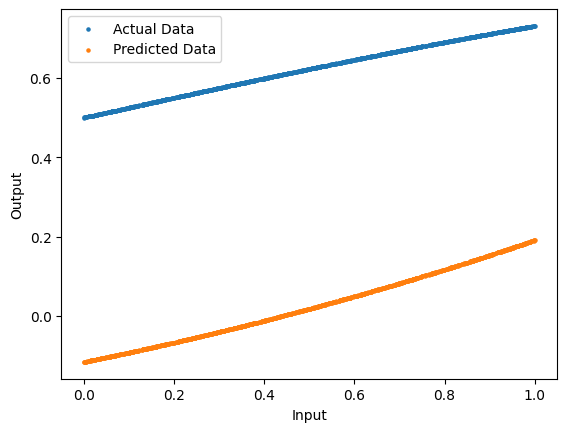

In [64]:
import matplotlib.pyplot as plt
plt.scatter(X, y, label='Actual Data', s=5)
plt.scatter(X, nn.output, label='Predicted Data', s=5)
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load Iris dataset and preprocess
iris = load_iris()
X = iris.data
y = iris.target
scaler = StandardScaler()
X = scaler.fit_transform(X)
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y.reshape(-1, 1))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


learning_rate = 0.00001
epochs = 1500


input_size = 4
hidden1_size = 8
hidden2_size = 6
hidden3_size = 4
output_size = 3
# Create the neural network
nn = NeuralNetwork(input_size, hidden1_size, hidden2_size,hidden3_size, output_size)

# Train the neural network
nn.train(X_train, y_train, learning_rate, epochs)

# Evaluate the trained model
def accuracy(y_true, y_pred):
    return np.mean(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1))

y_pred = nn.feedforward(X_test)
acc = accuracy(y_test, y_pred)
print(f'Test Accuracy: {acc * 100:.2f}%')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 0/1500, Loss: 24.5142
Epoch 1/1500, Loss: 20.1839
Epoch 2/1500, Loss: 16.9633
Epoch 3/1500, Loss: 14.5262
Epoch 4/1500, Loss: 12.6527
Epoch 5/1500, Loss: 11.1913
Epoch 6/1500, Loss: 10.0348
Epoch 7/1500, Loss: 9.1068
Epoch 8/1500, Loss: 8.3516
Epoch 9/1500, Loss: 7.7283
Epoch 10/1500, Loss: 7.2068
Epoch 11/1500, Loss: 6.7645
Epoch 12/1500, Loss: 6.3846
Epoch 13/1500, Loss: 6.0540
Epoch 14/1500, Loss: 5.7632
Epoch 15/1500, Loss: 5.5046
Epoch 16/1500, Loss: 5.2724
Epoch 17/1500, Loss: 5.0623
Epoch 18/1500, Loss: 4.8706
Epoch 19/1500, Loss: 4.6946
Epoch 20/1500, Loss: 4.5322
Epoch 21/1500, Loss: 4.3815
Epoch 22/1500, Loss: 4.2411
Epoch 23/1500, Loss: 4.1099
Epoch 24/1500, Loss: 3.9869
Epoch 25/1500, Loss: 3.8712
Epoch 26/1500, Loss: 3.7622
Epoch 27/1500, Loss: 3.6594
Epoch 28/1500, Loss: 3.5621
Epoch 29/1500, Loss: 3.4699
Epoch 30/1500, Loss: 3.3826
Epoch 31/1500, Loss: 3.2996
Epoch 32/1500, Loss: 3.2207
Epoch 33/1500, Loss: 3.1457
Epoch 34/1500, Loss: 3.0743
Epoch 35/1500, Loss: 3.